In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, get_sun, get_body, get_moon
from astroplan import (
    Observer, FixedTarget, time_grid_from_range,
    download_IERS_A, AirmassConstraint,MoonSeparationConstraint,
    moon_illumination, AltitudeConstraint, AtNightConstraint,
    is_observable,is_always_observable, months_observable, observability_table
)
from astroplan.plots import plot_sky, plot_airmass, plot_parallactic
import warnings

In [2]:
# ADD COMMENTS

In [3]:
warnings.simplefilter("ignore")

In [4]:
download_IERS_A()

In [5]:
mro = Observer.at_site('Manastash Ridge Observatory', timezone='US/Pacific')
print(mro)

<Observer: name='Manastash Ridge Observatory',
    location (lon, lat, el)=(-120.72780000000003 deg, 46.95280000000002 deg, 1198.000000001222 m),
    timezone=<DstTzInfo 'US/Pacific' LMT-1 day, 16:07:00 STD>>


In [6]:
now = Time.now()
print(now.iso, '(iso)', '=', now.to_datetime(timezone=mro.timezone), '(PT)')

2022-08-08 00:05:44.280 (iso) = 2022-08-07 17:05:44.280179-07:00 (PT)


### Observing times

In [7]:
day_1 = Time('2022-07-07')
day_2 = Time('2022-07-08')
day_3 = Time('2022-07-09')
day_4 = Time('2022-07-10')

def obsv_fn(day):
    observe_start = Time(mro.twilight_evening_astronomical(day, which='nearest'))
    observe_end = Time(mro.twilight_morning_astronomical(day, which='nearest'))
    
    window = [observe_start,observe_end]
    lst_window = mro.local_sidereal_time(window)
    
    print(day)
    print('Observing time in\nJD:',window[0],'-',window[1])
    print('LST:',lst_window[0],'-',lst_window[1])
    print('ISO:',window[0].iso,'-',window[1].iso)
    print('\nTotal observing length is',(window[1]-window[0]).sec/3600, 'hours')
    return window

In [8]:
window_1 = obsv_fn(day_1)
window_1;

2022-07-07 00:00:00.000
Observing time in
JD: 2459767.7812714777 - 2459767.8964674277
LST: 17h42m59.95630375s - 20h29m20.13625122s
ISO: 2022-07-07 06:45:01.856 - 2022-07-07 09:30:54.786

Total observing length is 2.7647028006613255 hours


In [9]:
window_2 = obsv_fn(day_2)
window_2;

2022-07-08 00:00:00.000
Observing time in
JD: 2459768.780165436 - 2459768.8977924827
LST: 17h45m20.68592295s - 20h35m11.48798164s
ISO: 2022-07-08 06:43:26.294 - 2022-07-08 09:32:49.271

Total observing length is 2.8230491168797016 hours


In [10]:
window_3 = obsv_fn(day_3)
window_3;

2022-07-09 00:00:00.000
Observing time in
JD: 2459769.778991757 - 2459769.899184166
LST: 17h47m35.55875914s - 20h41m08.61545571s
ISO: 2022-07-09 06:41:44.888 - 2022-07-09 09:34:49.512

Total observing length is 2.884617816656828 hours


In [11]:
window_4 = obsv_fn(day_4)
window_4;

2022-07-10 00:00:00.000
Observing time in
JD: 2459770.77775148 - 2459770.90064113
LST: 17h49m44.66610353s - 20h47m11.40301043s
ISO: 2022-07-10 06:39:57.728 - 2022-07-10 09:36:55.394

Total observing length is 2.949351590126753 hours


In [12]:
time_resolution=0.5*u.hour
window_time_grid_1 = time_grid_from_range(window_1, time_resolution=time_resolution)
window_time_grid_2 = time_grid_from_range(window_2, time_resolution=time_resolution)
window_time_grid_3 = time_grid_from_range(window_3, time_resolution=time_resolution)
window_time_grid_4 = time_grid_from_range(window_4, time_resolution=time_resolution)

### Sun moon rise set times

In [36]:
def sun_moon(day, window, x='nearest'):
    print(day)
    sunset = mro.sun_set_time(day,which="nearest")
    sunrise = mro.sun_rise_time(day,which="next")
    print('Sun sets at:',sunset.to_datetime(timezone=mro.timezone),'\nand rises at:' 
          , sunrise.to_datetime(timezone=mro.timezone))
    moonset=mro.moon_set_time(day, which="nearest")
    moonrise=mro.moon_rise_time(day, which=x)
    phase=mro.moon_phase(window)
    illum=mro.moon_illumination(window)
    # print('\nMoon rises at:',moonrise.to_datetime(timezone=mro.timezone),'\nand sets at:'
          #, moonset.to_datetime(timezone=mro.timezone),'\nMoon illumination:', illum)
    #print(phase)

In [37]:
sun_moon(day_1, window_1)
sun_moon(day_2, window_2)
sun_moon(day_3, window_3)
sun_moon(day_4, window_4, 'previous')

2022-07-07 00:00:00.000
Sun sets at: 2022-07-06 20:53:37.907269-07:00 
and rises at: 2022-07-07 05:22:18.758299-07:00
2022-07-08 00:00:00.000
Sun sets at: 2022-07-07 20:53:10.262157-07:00 
and rises at: 2022-07-08 05:23:06.181900-07:00
2022-07-09 00:00:00.000
Sun sets at: 2022-07-08 20:52:40.096116-07:00 
and rises at: 2022-07-09 05:23:55.328244-07:00
2022-07-10 00:00:00.000
Sun sets at: 2022-07-09 20:52:07.421741-07:00 
and rises at: 2022-07-10 05:24:45.408399-07:00


In [15]:
sun_moon(day_2, window_2)

2022-07-08 00:00:00.000
Sun sets at: 2022-07-07 20:53:10.262157-07:00 
and rises at: 2022-07-08 05:23:06.181900-07:00

Moon rises at: 2022-07-07 14:17:04.245340-07:00 
and sets at: 2022-07-08 01:06:39.885634-07:00 
Moon illumination: [0.62812878 0.64064242]
[1.31164785 1.28566357] rad


In [16]:
sun_moon(day_3, window_3)

2022-07-09 00:00:00.000
Sun sets at: 2022-07-08 20:52:40.096116-07:00 
and rises at: 2022-07-09 05:23:55.328244-07:00

Moon rises at: 2022-07-08 15:34:07.111394-07:00 
and sets at: 2022-07-09 01:29:00.129299-07:00 
Moon illumination: [0.73225952 0.74432583]
[1.08770491 1.06025266] rad


In [17]:
# weird thing, have to put 'previous'

sun_moon(day_4, window_4, 'previous')

2022-07-10 00:00:00.000
Sun sets at: 2022-07-09 20:52:07.421741-07:00 
and rises at: 2022-07-10 05:24:45.408399-07:00

Moon rises at: 2022-07-09 16:55:35.245290-07:00 
and sets at: 2022-07-10 01:57:18.483515-07:00 
Moon illumination: [0.82757729 0.83836933]
[0.85640911 0.82747259] rad


### Moon/Target locations

In [24]:
# edit these
salda = FixedTarget.from_name('BD+234616') # p = 0.2785d
# QX_Sge = FixedTarget.from_name('QX Sge') # p = 0.381967d
# TCP_J210 = FixedTarget.from_name('TCP J21040470+4631129') # p = 0.05352d

# N_Cas2021 = FixedTarget.from_name('N Cas 2021') # p = 0.1883907d; this one???
# V0512_Cam = FixedTarget.from_name('V0512 Cam') # p = 0.572734d

# DM_Cyg = FixedTarget.from_name('DM Cyg') # p = 0.41986d

# NGC_7790 = FixedTarget.from_name('NGC 7790') # star cluster

strs = []

In [25]:
# and these
targets = [salda]
for c, i in zip(strs, ['EDIT THIS']):
    t = FixedTarget(coord=c,name=i)
    targets.append(t)

targets

[<FixedTarget "BD+234616" at SkyCoord (ICRS): (ra, dec) in deg (342.58540551, 24.52983068)>]

In [26]:
def loc(grid, targets=targets):
    moon = FixedTarget(mro.moon_altaz(grid),name='Moon')
    plt.figure(figsize=(8,8))
    plot_sky(moon,mro,grid)
    for item in targets:
        plot_sky(item,mro,grid)
    plt.legend(loc='center', bbox_to_anchor=(.5,1.12),ncol=2)

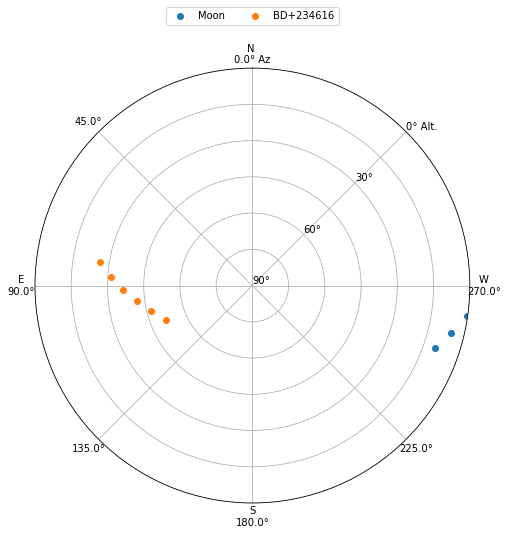

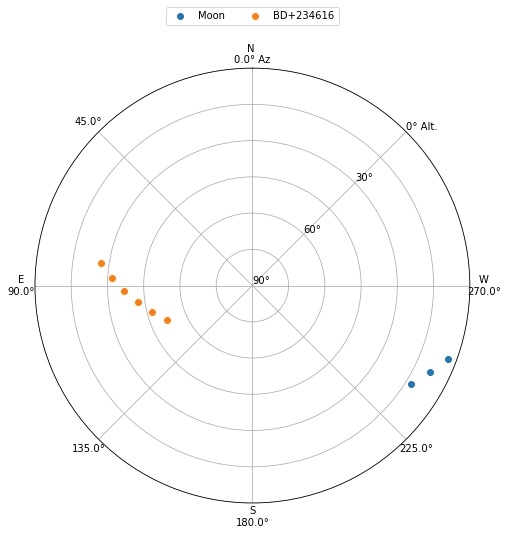

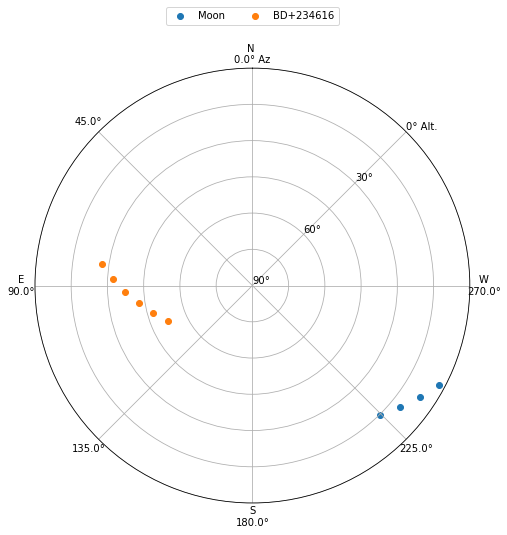

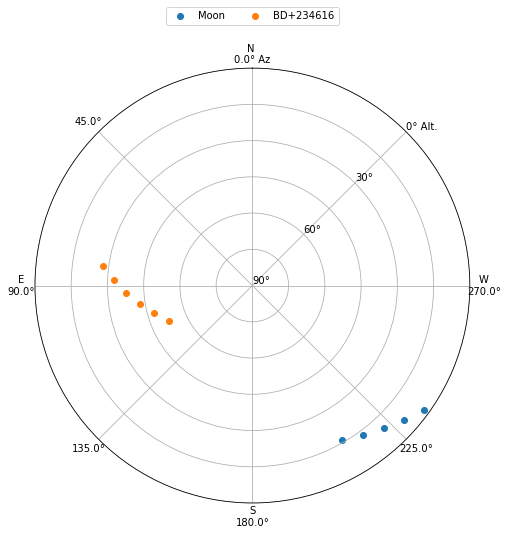

In [27]:
loc(window_time_grid_1), loc(window_time_grid_2), loc(window_time_grid_3), loc(window_time_grid_4);

### Airmass plots for variable stars

In [28]:
moon_1 = FixedTarget(mro.moon_altaz(window_time_grid_1), name='Moon')
moon_2 = FixedTarget(mro.moon_altaz(window_time_grid_2), name='Moon')
moon_3 = FixedTarget(mro.moon_altaz(window_time_grid_3), name='Moon')
moon_4 = FixedTarget(mro.moon_altaz(window_time_grid_4), name='Moon')

In [29]:
def plot(target, moon, window):
    plt.figure(figsize=(9,7))
    plt.ylim(1, 1.75)
    plot_airmass(moon, mro, window, max_airmass=3, style_kwargs={'linestyle':'--', 'color': '0'})
    plot_airmass(target, mro , window, max_airmass=3)
    plt.legend(loc='center', bbox_to_anchor=(.5,1.05), ncol=8)

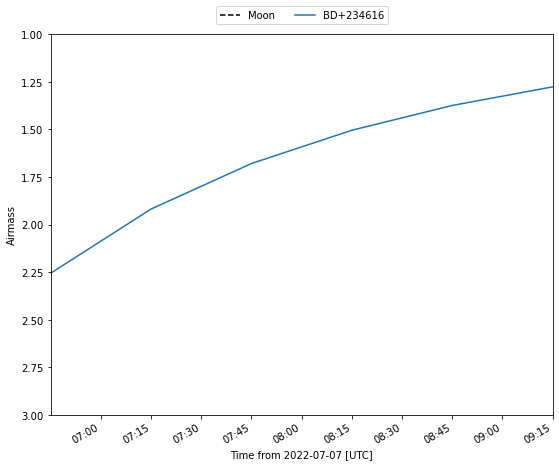

In [30]:
plot(targets, moon_1, window_time_grid_1);
# plt.savefig('plot_1p2')

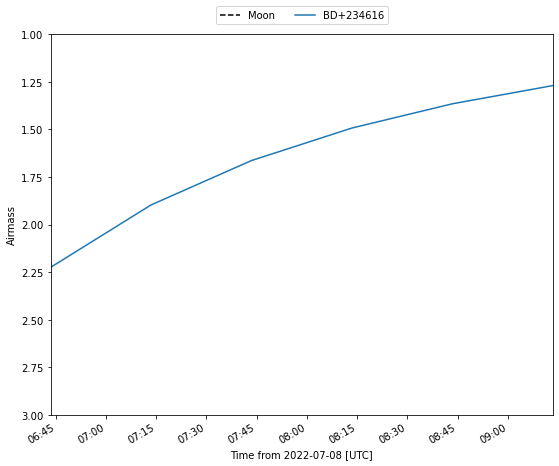

In [31]:
plot(targets, moon_2, window_time_grid_2);
# plt.savefig('plot_2p2')

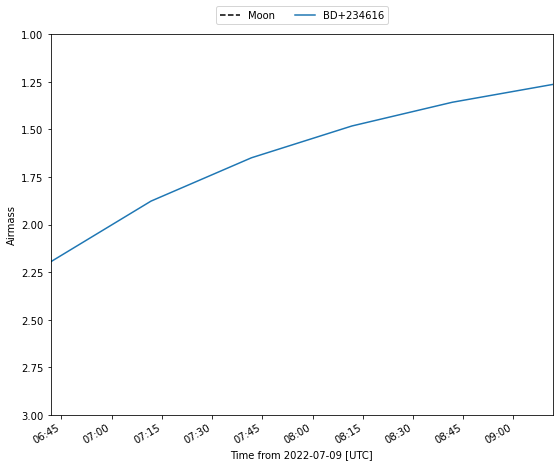

In [32]:
plot(targets, moon_3, window_time_grid_3);
# plt.savefig('plot_3p2')

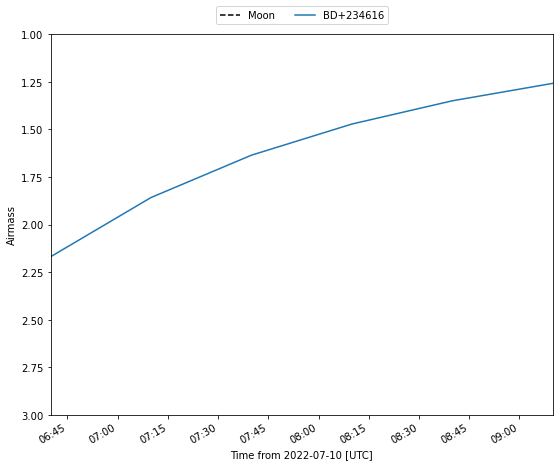

In [33]:
plot(targets, moon_4, window_time_grid_4);
# plt.savefig('plot_4p2')